It is worth noting that while LDA has a theoretical parametric basis (one can think of it as a tool for visualizing the space within which the hypothesis tests in a MANOVA occur) it does not have to be used for hypothesis testing; it can be used for exploratory analyses, just like the other techniques we have already discussed. However, you can get into some philosophically troubled waters if you use LDA in an exploratory, non-test based way and then use MANOVA to test for differences among groups having already seen that the differences exist. Multivariate fishing expeditions suffer from all the same dangers (and probably more) as their univariate cousins. So, to play it safe here are suggested sequences of analysis that avoid the dangers of fishing for significant results:

1.    Use LDA for exploratory analyses and collect new data for hypothesis testing perhaps using the results of your LDA to form the priors for a Bayesian analysis,
2.    State your null and experimental hypotheses in advance of the analysis and then use LDA and MANOVA to test them
3.    Use LDA in the situation where you have stated your hypotheses in advance and tested with MANOVA, to visualize the results and add explanatory detail.



In [1]:
library(MASS)

Ignoring our own advice, we will demonstrate the combination of LDA and MANOVA on the field survey data by reanalyzing it to determine if there is a significant difference among the regions with respect to diseases.

In [2]:
data <- read.csv("https://raw.githubusercontent.com/openplantpathology/OPP_Workshop_Multivariate/master/data/PCA1_Survey.csv", head = TRUE)
cordata <- data[c(-7, -8, -9)]
lda_expl <- cordata[, 3:14]

In [3]:
data

Ref,region,ST_L,St_G,Sn_L,Sn_G,Yr_L,Yr_G,Br_L,Pm_L,Pm_G,Fu_L,Bo_L,SM_E,ES,SES,TA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
W101,N,2.1,0.8,0.7,0,0,0,0,0.8,1.4,1.8,0.2,0,0.00,6.90,0.0
W102,N,2.0,1.4,0.2,0,0,0,0,0.0,0.2,1.5,0.5,0,0.00,6.90,1.2
W103,N,2.4,0.5,0.0,0,0,0,0,0.7,0.6,0.7,0.8,0,0.00,1.40,0.0
W105,N,0.2,0.5,0.0,0,0,0,0,2.0,2.3,1.0,0.1,0,0.00,8.30,1.2
W106,N,1.8,0.3,0.2,0,0,0,0,2.1,1.3,1.0,0.4,0,0.00,11.40,0.0
W107,N,1.2,0.2,0.3,0,0,0,0,0.2,0.4,0.6,0.1,0,0.00,2.35,1.6
W108,N,2.9,0.7,0.8,0,0,0,0,0.1,0.2,0.8,0.4,0,0.00,1.40,8.9
W109,N,2.1,1.3,0.0,0,0,0,0,0.0,0.2,1.1,0.1,0,0.00,1.30,0.2
W110,N,2.2,1.7,0.4,0,0,0,0,0.5,1.1,1.2,0.3,0,0.00,1.30,0.6


In [4]:
region_lda <- lda(lda_expl, grouping = cordata$region)
region_lda

Call:
lda(lda_expl, grouping = cordata$region)

Prior probabilities of groups:
        E         N         W 
0.3414634 0.4146341 0.2439024 

Group means:
      ST_L      St_G      Sn_L      Sn_G      Pm_L      Pm_G      Fu_L
E 2.071429 0.0000000 1.1428571 0.2857143 0.3571429 0.1428571 0.7142857
N 1.805882 0.8352941 0.2529412 0.0000000 0.6000000 0.7176471 1.2117647
W 5.000000 2.2000000 0.1000000 0.1000000 0.0000000 0.0000000 0.9000000
       Bo_L      SM_E       ES      SES       TA
E 0.6428571 0.9285714 11.84643 8.800714 0.000000
N 0.3176471 0.0000000  0.00000 5.049412 1.864706
W 0.9000000 1.5000000  7.86600 6.931000 2.640000

Coefficients of linear discriminants:
             LD1         LD2
ST_L  0.24561018  0.04340412
St_G  1.77682294 -0.34217993
Sn_L -1.12748453  0.30222420
Sn_G  1.41477636  0.59130386
Pm_L  1.17698492  0.35323668
Pm_G -0.68126225 -0.69007369
Fu_L -1.42770688 -0.39274438
Bo_L  0.66179996  0.44118265
SM_E  1.16312030  0.56955987
ES   -0.07924553  0.07603390
SES   0

1. The first section is a summary of the proportion of objects in each of the categories of the grouping factor. These are labeled prior probabilities because lda has a predictive capacity and if one has “unknown” objects it can be used to predict their identity. 

2. The second section of output shows the mean values for each of the variables for each of the levels of the grouping factor. Inspection of this information will start to reveal the nature of any differences there might be among class of the grouping factor. 

3. The third section of output shows us the coefficients (or loadings) applied to each of the data variables in the construction of the discriminant axes.
  
5. Proportion of variance: In the case of the disease data, the first LDA accounts for 83.5% of the variance ratio, while the second axis accounts for the remaining 16.5%.

Conceptually LDA has a lot in common with PCA, but in the case of LDA the new “components” or discriminant functions are formed with the constraint that they maximize the ratio of between group to within group variance. This contrasts PCA, where the new variables are formed simply to maximize the amount of variance captured overall. 

Unlike the situation with PCA where the maximum number of non-zero components is one less than the number of original data variables, with LDA the number of possible axes is one less than the number of groups. 



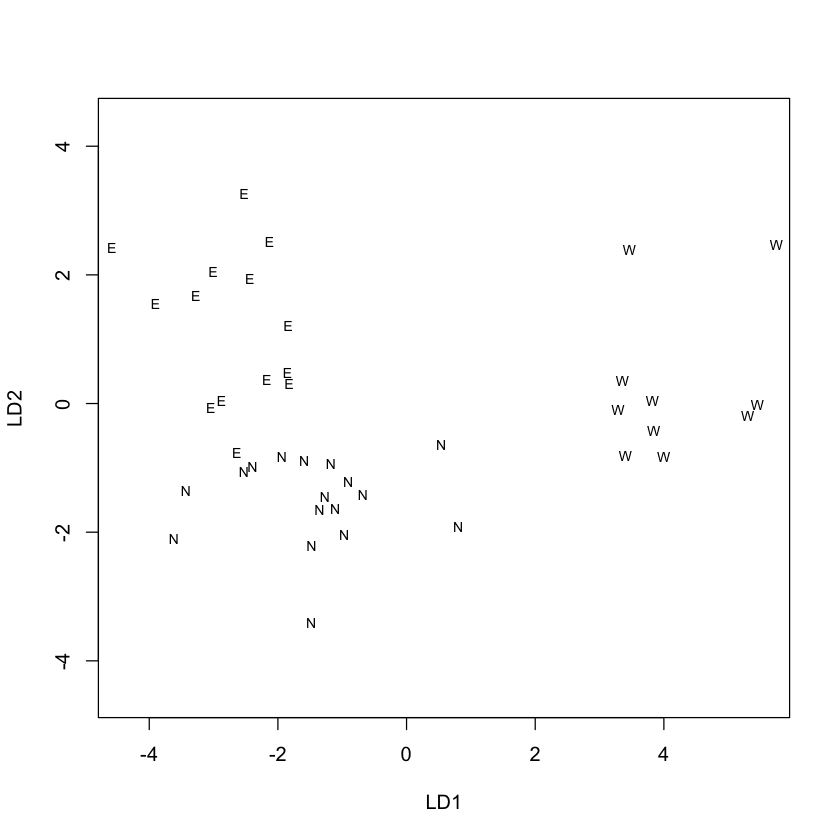

In [5]:
region_ldaplt <- plot(region_lda)

In [6]:
lda.arrows <- function(x, myscale = 1, tex = 0.75, choices = c(1, 2), ...) {
  ## adds `biplot` arrows to an lda using the discriminant function values
  heads <- coef(x)
  arrows(
    x0 = 0, y0 = 0,
    x1 = myscale * heads[, choices[1]],
    y1 = myscale * heads[, choices[2]], ...
  )
  text(myscale * heads[, choices],
    labels = row.names(heads),
    cex = tex, pos = 1, offset = 0.5
  )
}

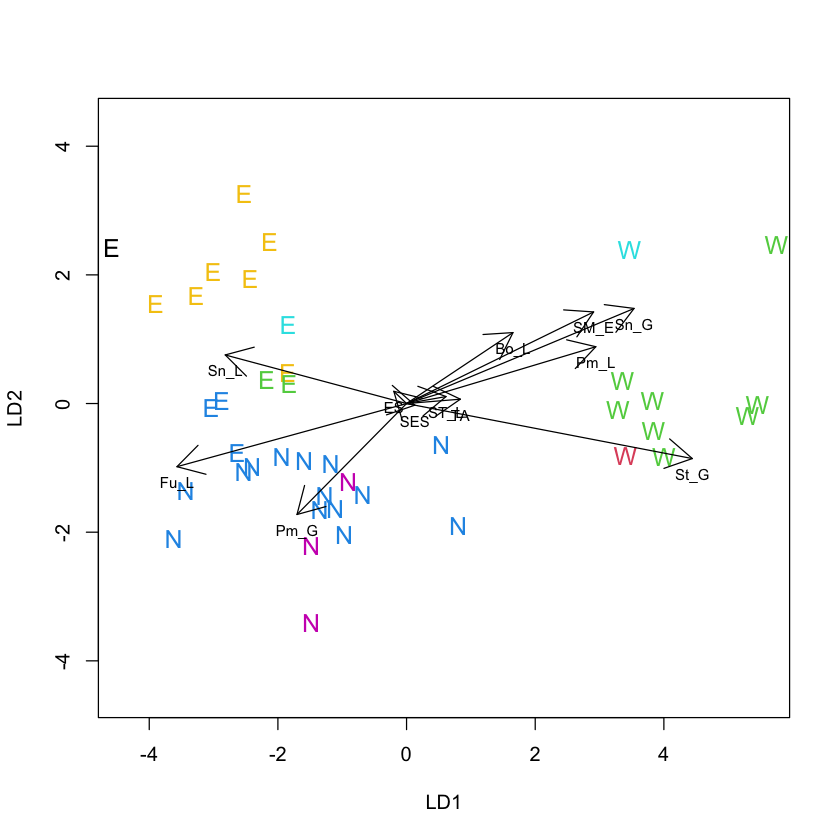

In [7]:
NHCA_data1 <- data.frame(cordata[, 1:2], scale(cordata[, 3:14]))
NHCA_fields2 <- kmeans(NHCA_data1[, 3:14], 7)
plot(region_lda, asp = 1, col = NHCA_fields2$cluster, cex = 1.25)
lda.arrows(region_lda, col = 1, lwd = 1, myscale = 2.5)

Overall, the LDA suggests that there are differences among all three regions. The major difference is between the West and the other two, with fields in the West being associated with diseases typical of wet late season conditions (glume and ear diseases are more intense). The difference between the North and East regions is smaller in absolute terms but nonetheless appears to be a real difference.

In [8]:
cat(colnames(cordata), sep=', ')

Ref, region, ST_L, St_G, Sn_L, Sn_G, Pm_L, Pm_G, Fu_L, Bo_L, SM_E, ES, SES, TA

In [9]:
lda_expl <- data.frame(lda_expl)
region_MAN <- manova(
  cbind(ST_L, St_G, Sn_L, Sn_G, Pm_L, Pm_G, Fu_L, Bo_L, 
        SM_E, ES, SES, TA) ~ cordata$region,
  data = lda_expl
)
summary(region_MAN, test = "Pillai")

               Df Pillai approx F num Df den Df    Pr(>F)    
cordata$region  2 1.4986   6.9741     24     56 1.201e-09 ***
Residuals      38                                            
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [10]:
summary(region_MAN, test = "Wilks")

               Df    Wilks approx F num Df den Df    Pr(>F)    
cordata$region  2 0.043523   8.5351     24     54 4.286e-11 ***
Residuals      38                                              
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [11]:
summary(region_MAN, test = "Hotelling-Lawley")

               Df Hotelling-Lawley approx F num Df den Df    Pr(>F)    
cordata$region  2           9.5202   10.313     24     52 1.942e-12 ***
Residuals      38                                                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

There are several such tests for MANOVA which differ in their tendency to type 1 and type 2 errors. Wilks test tends to be conservative while the Hotelling-Lawley test tends to be lax. It’s a good idea to look at all of the options and come to a consensus. In this case, there’s no conflict. All of the tests point to a clear case for rejecting the null hypothesis of no difference among the different regions.